In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy

In [2]:
sc.settings.verbosity = 0

import warnings
warnings.filterwarnings("ignore")

In [3]:
ada = sc.read_h5ad('./data/HCC.h5ad')
HVG = list(ada.var_names)
ada

AnnData object with n_obs × n_vars = 73589 × 2608
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [4]:
ada = ada.raw.to_adata()
ada

AnnData object with n_obs × n_vars = 73589 × 19852
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'

In [5]:
np.unique(ada.obs['NormalvsTumor'])

array(['N', 'T'], dtype=object)

In [6]:
np.unique(ada.obs['louvain'])

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [7]:
map_dict = {0: 'CD4+ T-helper cells', 1: 'Nk Cells', 2: 'Endothelial Cells', 3: 'CD8+ cytotoxic T cells', 4: 'CD8+ cytotoxic T cells', 5: 'CD4+ T-helper cells', 6: 'Endothelial Cells', 7: 'Hepatocytes', 8: 'Myeloid', 9: 'Nk Cells', 10: 'Myeloid', 11: 'Hepatocytes', 12: 'Tregs', 13: 'Fibroblasts', 14: 'Hepatocytes', 15: 'Nk Cells', 16: 'Hepatocytes', 17: 'Endothelial Cells', 18: 'B cells', 19: 'Myeloid', 20: 'Hepatocytes', 21: 'Hepatocytes', 22: 'Nk Cells', 23: 'CD4+ T-helper cells', 24: 'Bi-Potent Cells', 25: 'Hepatocytes', 26: 'Endothelial Cells', 27: 'Endothelial Cells', 28: 'Mast Cells'}
ada.obs['indent'] = ada.obs['louvain'].astype(int).map(map_dict)
ada.obs['indent'] = ada.obs['indent'].astype('category')
ada.obs.head()

,n_genes,percent_mito,n_counts,louvain,patient_id,patient_tumorsection,NormalvsTumor,patientno,PNC,PIC,ViralvsNonViral,indent
index,,,,,,,,,,,,
AAACCTGGTCGGGTCT-1,502,0.021596,1065.0,4,1,P1_N,N,P1,N,N,Positive,CD8+ cytotoxic T cells
AAAGCAAGTTCGAATC-1,414,0.021692,922.0,0,1,P1_N,N,P1,N,N,Positive,CD4+ T-helper cells
AACCATGAGTAATCCC-1,1276,0.033444,3319.0,9,1,P1_N,N,P1,N,N,Positive,Nk Cells
AACCGCGAGCTCCTCT-1,788,0.018448,1843.0,4,1,P1_N,N,P1,N,N,Positive,CD8+ cytotoxic T cells
AACCGCGCACATGTGT-1,591,0.047297,1332.0,0,1,P1_N,N,P1,N,N,Positive,CD4+ T-helper cells


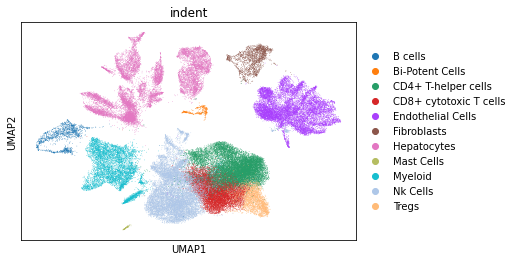

In [8]:
sc.pl.umap(ada, color='indent')

In [9]:
data = scipy.sparse.csr_matrix.toarray(ada.X) 
counts = np.asarray(np.expm1(data), dtype=int)

ada.layers['raw'] = counts
ada.layers['log1p'] = data
ada.X = data

In [10]:
ada = ada[:, HVG]
ada

View of AnnData object with n_obs × n_vars = 73589 × 2608
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral', 'indent'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups', 'indent_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'log1p'

In [11]:
#ada.write('./HCC_processed.h5ad')